# Codigos usados para testar funcionalidades

In [5]:
import pandas as pd

# Cria um DataFrame de exemplo
data = {'Nome': ['Alice', 'Bob', 'Charlie', 'Dave'],
        'Idade': [25, 30, 35, 40],
        'Sexo': ['F', 'M', 'M', 'M']}
df = pd.DataFrame(data)

print(df)



      Nome  Idade Sexo
0    Alice     25    F
1      Bob     30    M
2  Charlie     35    M
3     Dave     40    M


In [6]:
# Remove as linhas onde a coluna 'Sexo' é igual a 'M'
df = df.drop(df[df['Sexo'] == 'M'].index)

# Exibe o DataFrame resultante
print(df)

    Nome  Idade Sexo
0  Alice     25    F


In [7]:
import matplotlib.pyplot as plt

# Criar um DataFrame de exemplo
data = {'nome': ['João', 'Maria', 'José', 'Pedro', 'Lucas', 'Luana', 'Sofia', 'Paula', 'Laura', 'Fernando'],
        'idade': [25, 30, 21, 27, 29, 28, 31, 26, 24, 33],
        'sexo': ['M', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'M']}

df = pd.DataFrame(data)

print(data)


{'nome': ['João', 'Maria', 'José', 'Pedro', 'Lucas', 'Luana', 'Sofia', 'Paula', 'Laura', 'Fernando'], 'idade': [25, 30, 21, 27, 29, 28, 31, 26, 24, 33], 'sexo': ['M', 'F', 'M', 'M', 'M', 'F', 'F', 'F', 'F', 'M']}


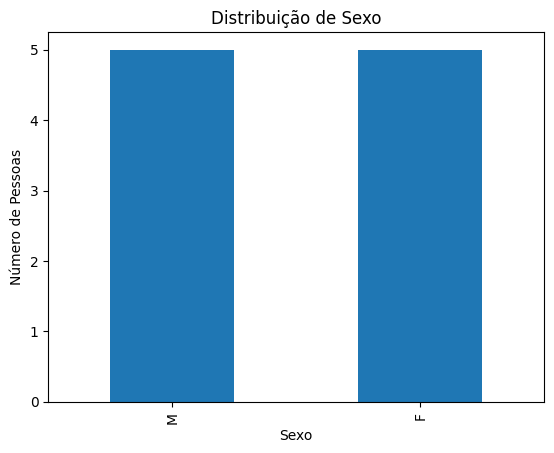

In [8]:
# Contar o número de linhas para cada valor na coluna "sexo"
counts = df['sexo'].value_counts()

# Gerar o gráfico de barras
fig, ax = plt.subplots()
counts.plot(kind='bar', ax=ax)

# Personalizar o gráfico
ax.set_title('Distribuição de Sexo')
ax.set_xlabel('Sexo')
ax.set_ylabel('Número de Pessoas')

# Mostrar o gráfico
plt.show()


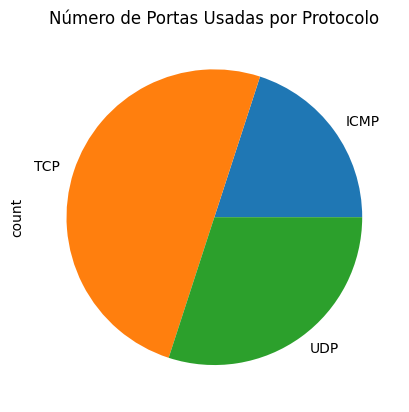

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar um DataFrame de exemplo
data = {'protocol': ['TCP', 'UDP', 'ICMP', 'TCP', 'UDP', 'TCP', 'TCP', 'UDP', 'ICMP', 'TCP'],
        'dst_port': [80, 53, 0, 8080, 123, 22, 443, 443, 0, 80]}
df = pd.DataFrame(data)

# Contar o número de portas usadas por cada protocolo
counts = df.groupby(['protocol', 'dst_port']).size().reset_index(name='count')

# Agrupar as portas por protocolo
grouped = counts.groupby('protocol')['count'].sum()

# Gerar o gráfico de pizza
fig, ax = plt.subplots()
grouped.plot(kind='pie', ax=ax)

# Personalizar o gráfico
ax.set_title('Número de Portas Usadas por Protocolo')

# Mostrar o gráfico
plt.show()


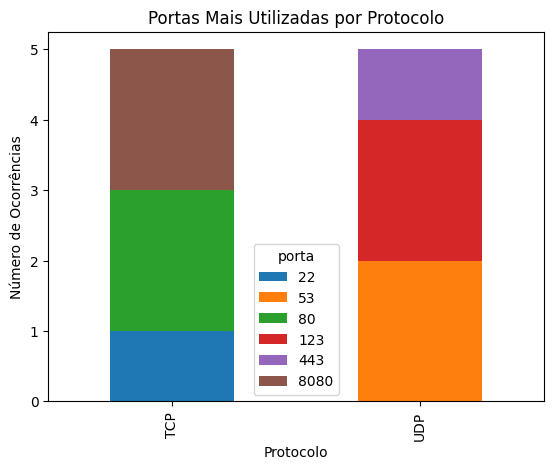

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar um DataFrame de exemplo
data = {'protocolo': ['TCP', 'UDP', 'TCP', 'TCP', 'UDP', 'TCP', 'UDP', 'UDP', 'TCP', 'TCP', 'UDP'],
        'porta': [80, 53, 8080, 443, 123, 22, 53, 443, 80, 8080, 123]}
df = pd.DataFrame(data)

# Contar o número de vezes que cada porta foi usada para cada protocolo
counts = df.groupby(['protocolo', 'porta']).size().reset_index(name='count')

# Ordenar os dados pela contagem decrescente
counts = counts.sort_values(['protocolo', 'count'], ascending=[True, False])

# Selecionar as 3 portas mais utilizadas por cada protocolo
top_ports = counts.groupby('protocolo').head(3)

# Gerar o gráfico de barras empilhadas
fig, ax = plt.subplots()
top_ports.pivot(index='protocolo', columns='porta', values='count').plot(kind='bar', stacked=True, ax=ax)

# Personalizar o gráfico
ax.set_title('Portas Mais Utilizadas por Protocolo')
ax.set_xlabel('Protocolo')
ax.set_ylabel('Número de Ocorrências')

# Mostrar o gráfico
plt.show()


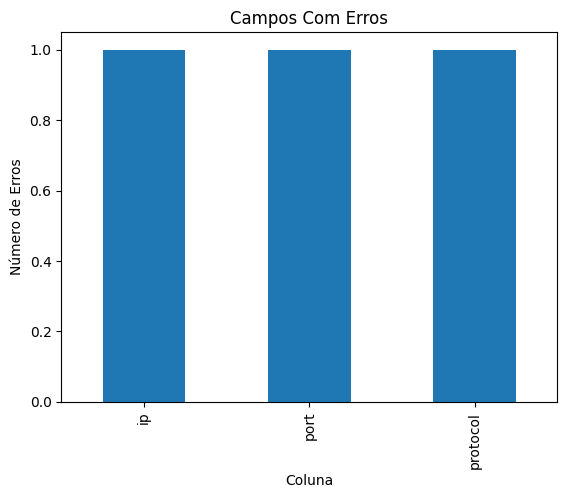

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar um DataFrame de exemplo com alguns dados nulos e errados
data = {'protocol': ['TCP', None, 'UDP', 'TCP', 'UDP', 'TCP', 'UDP'],
        'port': [80, '53', '8080', None, 123, 22, 53],
        'ip': ['192.168.1.1', '127.0.0.1', '192.168.1.2', 'invalid', '192.168.1.3', '192.168.1.4', None]}
df = pd.DataFrame(data)

# Verificar quais campos estão nulos, NaN, tipo errado ou vazios
errors = df.isnull() | df.isna() | (df['port'].apply(lambda x: isinstance(x, str) and not x.isnumeric()))

# Contar o número de erros em cada coluna
col_errors = errors.sum()

# Filtrar apenas as colunas com erros
col_errors = col_errors[col_errors != 0]

# Gerar o gráfico de barras
fig, ax = plt.subplots()
col_errors.plot(kind='bar', ax=ax)

# Personalizar o gráfico
ax.set_title('Campos Com Erros')
ax.set_xlabel('Coluna')
ax.set_ylabel('Número de Erros')

# Mostrar o gráfico
plt.show()


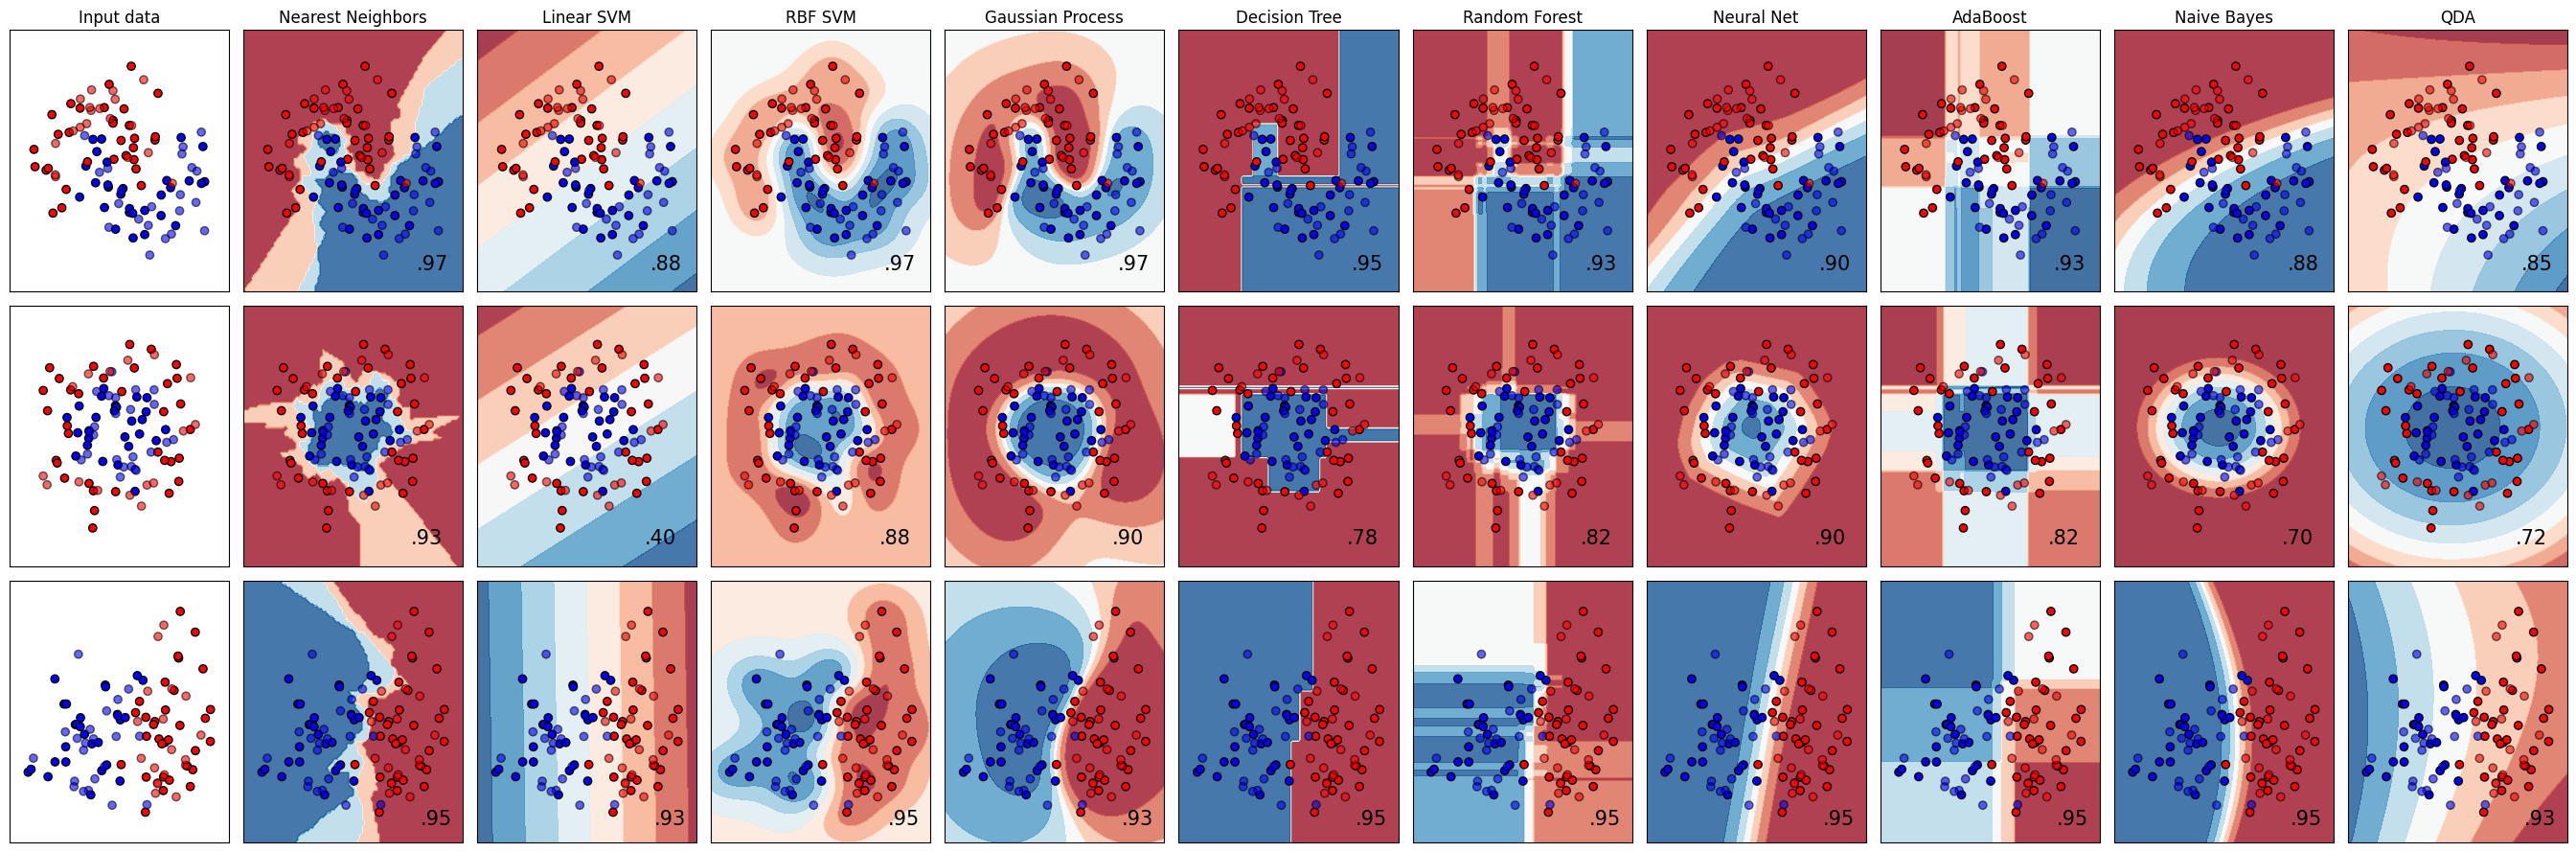

In [2]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

# gera dados para classificação aleatória de 2 classes 
X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

* Referencia do codigo [site](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py) 

In [5]:
i = 1
for ds_cnt, ds in enumerate(datasets):
    print(f"iteração {i}")
    print(f"{ds_cnt} | {ds}")
    i += 1

iteração 1
0 | (array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
    

/home/maycon/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


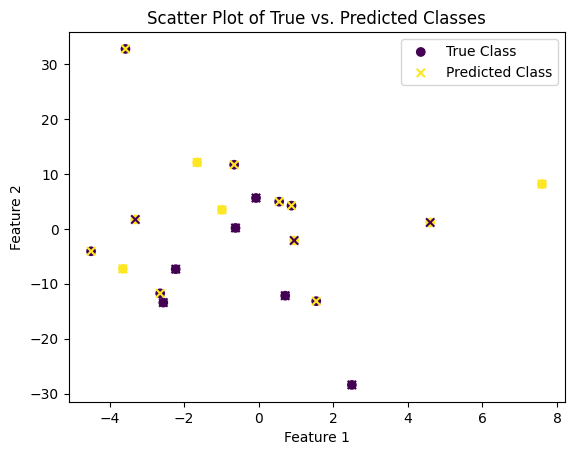

In [6]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

# Gere um conjunto de dados de exemplo (substitua por seus próprios dados)
X, y = make_classification(n_samples=100, n_features=50, n_informative=40, n_classes=2, random_state=42)

# Divida os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crie e treine o modelo
model = LogisticRegression()
model.fit(X_train, y_train)

# Faça previsões
y_pred = model.predict(X_test)

# Crie um gráfico de dispersão
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker='o', label='True Class')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, marker='x', label='Predicted Class')
plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of True vs. Predicted Classes')
plt.show()


In [1]:
from pandas import DataFrame

def open_datasets (datasets:dict) -> DataFrame:

    for key, values in  datasets.items():

        for item in values:

            


datasets = {
    'Fixo':['7.pcap','10.pcap','13.pcap'],
    'IOT':['13-15-2018.pcap', '12-10-11.pcap', '13-25-12.pcap']
}

open_datasets(datasets)

Fixo -- 7.pcap
Fixo -- 10.pcap
Fixo -- 13.pcap
IOT -- 13-15-2018.pcap
IOT -- 12-10-11.pcap
IOT -- 13-25-12.pcap


In [1]:
import pandas as pd

# Seu DataFrame
df = pd.DataFrame({'coluna_a': [1, 2, 3, 4, 5]})

# Seu dicionário de mapeamento
meu_dicionario = {2: 'A', 3: 'B', 4: 'C'}

# Use a função map para aplicar o mapeamento
df['coluna_b'] = df['coluna_a'].map(meu_dicionario)

# O resultado será:
print(df)


   coluna_a coluna_b
0         1      NaN
1         2        A
2         3        B
3         4        C
4         5      NaN


In [2]:
import pandas as pd

# Seu DataFrame
df = pd.DataFrame({'coluna_a': [1, 2, 3, 4, 5]})

# Sua lista de valores
lista_valores = [2, 4, 6]

# Use a função isin() para verificar se os valores de 'coluna_a' estão na lista
df['nova_coluna'] = df['coluna_a'].isin(lista_valores).astype(int)

# O resultado será:
print(df)


   coluna_a  nova_coluna
0         1            0
1         2            1
2         3            0
3         4            1
4         5            0
